__Alejandro Gonzalez Garcia__

# <font color=#46769B>Final project: Black Holes and Gravitational Waves</font>

__Due date:__ April, 29, 2022, 11:59pm. Upload your submission to your GitHub repository

__Rules:__ 
- No collaboration with peers or other individuals.
- No discussion of questions over Slack public channels.
- You may use information from any website or other reference material. You must __cite__ any resources used (simply include the URLs).
- Instructor will not provide assistance with the project so please contact him only if you feel there is a genuine issue with the assignment (e.g. typos or errors in the problems).




## <font color=#46769B>Introduction</font>

In 2015, the Laser Interferometer Gravitational-Wave Observatory (LIGO) made history by making the [first direct observation of gravitational waves](https://www.ligo.org/detections/GW150914.php) (see also [here](https://en.wikipedia.org/wiki/First_observation_of_gravitational_waves)). 
These gravitational waves were the product of a binary pair of black holes (BHs), each around 30 solar masses, orbiting around each other and inspiralling as they lose energy, until they finally met their end in a cataclysmic merger. 

More information about gravitational waves can be found [here](https://www.ligo.caltech.edu/page/gravitational-waves).

This final project is divided into two sections:
- Section I deals with how BHs can pair-up into binaries. You are tasked with performing some numerical simulations for three-body interactions, as well as performing some Monte Carlo sampling for determining the likelihood that a binary BH pair can form. \[50 points\]
- Section II deals with gravitational wave observations made by LIGO. You are tasked with using your knowledge of spectral analysis to analyze real LIGO data from the first gravitational wave event ever recorded. \[50 points\]

## <font color=#46769B>Section I: Formation of Binary Black Hole Pairs [50 points total]</font>

BHs are thought to form as the [final end-product of very massive stars](https://www.nasa.gov/feature/goddard/2017/collapsing-star-gives-birth-to-a-black-hole) that exhaust their nuclear fuel and collapse to such a high density that not even light can escape the gravitational pull. However, we don't know exactly how *two* BHs can be in a binary pair. Do they form from a pair of massive stars in close proximity, or do they form from single BHs that form in isolation and later become gravitationally bound? Discussion of these different scenarios is provided [here](https://www.frontiersin.org/articles/10.3389/fspas.2020.00038/full).

Here we will investigate the second idea, which is known as __dynamical exchange__. The idea is:
- A BH forms in a binary pair with a normal star.
- The pair has a gravitational encounter with another BH.
- The pair is swapped: the two BHs are now bound together, while the normal star is ejected.

For the interested reader, some further scientific articles on dynamical exchange are provided [here](https://articles.adsabs.harvard.edu/pdf/1980AJ.....85.1281H) and [here](https://arxiv.org/abs/2004.09525).


### <font color=#46769B>Part (a): Two-body dynamics (warm-up question) [10 points]</font>

Here is the setup. First, consider two bodies, with masses $m_1$ and $m_2$, separated by a distance $R$. We will set up their initial conditions at time $t=0$ such that they would be in circular motion in the $x$-$y$ plane, around a common center of mass at the origin:

$$\mathbf{r}_1(0) = \left( \frac{m_1 R}{M}, 0 , 0 \right)  , 
\quad \mathbf{r}_2(0) = \left( - \frac{m_2 R}{M}, 0 , 0 \right)$$

$$\mathbf{v}_1(0) = \left( 0, \sqrt{\frac{G m_2^2}{M R} }, 0 \right) , \quad \mathbf{v}_2(0) = \left( 0, - \sqrt{\frac{G m_1^2}{M R} }, 0 \right)$$

where $M = m_1 + m_2$ and $G$ is Newton's constant. We will express

$$G = 39.42 \; {\rm AU}^3 \, {\rm yr}^{-2} \, M_\odot^{-1}$$

so that distances will be expressed in ${\rm AU}$, masses will be expressed in solar masses $M_\odot$, and velocities will be expressed in ${\rm AU/yr}$.

Let's assume that both bodies, given the initial conditions above, are left to evolve in time under the influence of gravity. Using any method, solve for $\mathbf{r}_1(t)$ and $\mathbf{r}_2(t)$ as a function of time and demonstrate that both bodies are in circular motion. 

Note: You don't need to be super-precise here. The goal here is just to make a plot that allows us to see *by eye* that the two bodies are in circular motion. (Be sure to show that they are in *circular motion*, not just in periodic motion.) Also, you can choose any values of $m_1$, $m_2$, and $R$ you like, except do *not* choose $m_1 = m_2$.

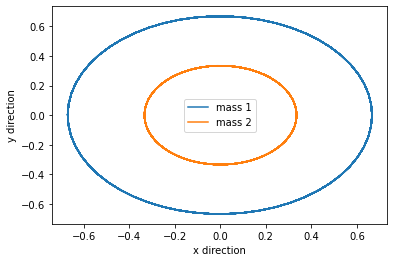

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10**3 
G = 39.42
t0, tf = 0, 10 
t = np.linspace(t0,tf,num_steps+1)
h = t[1] - t[0]

m1 = 1 
m2 = 2 

M = m1 + m2
R = 1 



r10 = np.array((m2*R/M,0,0))
r20 = np.array((-m1*R/M,0,0))

v10 = ((0,np.sqrt((G*m2**2)/(M*R)),0))
v20 = ((0,-(np.sqrt((G*m1**2)/(M*R))),0))

r0 = np.concatenate((r10,r20))
v0 = np.concatenate((v10,v20))

r = np.zeros((num_steps+1,6))
v = np.zeros((num_steps+1,6))

r[0] = r0
v[0] = v0

masses = np.array([m1,m2])

def accel(t,r):
  n = 2 
  r_vec = np.reshape(r,(n,3))

  a_vec = np.zeros((n,3))
  for i in range(n):
    for j in range(i+1,n):

      r_ji = r_vec[j] - r_vec[i]
      r_ji_mag = np.linalg.norm(r_ji)

      terms = G*r_ji/r_ji_mag**3

      a_vec[i] += masses[j] * terms
      a_vec[j] += -masses[i] * terms
  return np.concatenate(a_vec)

a = accel(t0,r0)

for i in range(num_steps):
  v_half = v[i] + h/2 * a 
  r[i+1] = r[i] + h*v_half
  a = accel(t[i+1],r[i+1])
  v[i+1] = v_half + h/2 * a 

r1 = r[:,:3]
r2 = r[:,3:]

x1, y1, z1 = r1[:,0], r1[:,1], r1[:,2]
x2, y2, z2 = r2[:,0], r2[:,1], r2[:,2]

plt.plot (x1,y1,label='mass 1')
plt.plot(x2,y2,label='mass 2')
plt.legend()
plt.xlabel('x direction')
plt.ylabel('y direction')
plt.show()

### <font color=#46769B>Part (b): Three-body dynamics: black hole perturber [10 points]</font>

Next, we will consider how a third body, with mass $m_3$, affects the situation. We will consider the following initial condition at time $t=0$. We write the initial velocity $\mathbf{v}_3(0) = \mathbf{V}$ in Cartesian form 

$$\mathbf{v}_3(0) = \mathbf{V} = \left( V_x, V_y, V_z \right) \, .$$

We write the initial position as

$$\mathbf{r}_3(0) = - \mathbf{V} \, t_* + \mathbf{b}$$

The motivation for this form is that in the absence of any other masses, $m_3$ would travel in a straight-line trajectory

$$\mathbf{r}_3(t) = \mathbf{V} \, (t - t_*) + \mathbf{b}$$

where $t_*$ is the time $m_3$ impacts the $x$-$y$ plane, at impact position

$$\mathbf b = b \left( \cos\alpha, \sin\alpha,0 \right)\, .$$ 

However, in the presence of masses $m_1$ and $m_2$, the third body will not follow a straight-line trajectory. Nevertheless, the parameters $t_*$, $b$, and $\alpha$ will approximately parametrize when and where $m_3$ encounters the binary $m_1$-$m_2$ pair.

Now that we have described the setup in general, we will consider:
- Mass $m_1$ will represent the normal star, initially a companion to a BH.
- Masses $m_2$ and $m_3$ will represent BHs. For simplicity, we take a common BH mass $m_{\rm BH} = m_2 = m_3$.

Your task is to write a function that does the following:
- Takes eight parameters as inputs
$$m_1, m_{\rm BH}, R, V_x, V_y, V_z, b, \alpha \, .$$ 
- You are free to fix the impact time to be anything you think is suitable, e.g., 
$$t_* = 10 \frac{R}{|\mathbf V|}$$
to ensure that mass $m_3$ is starting sufficiently far away.
- Using a method of your choice, numerically solve the system of coupled ODEs for 
$$\mathbf{r}_{1,2,3}(t), \quad \mathbf{v}_{1,2,3}(t)$$
assuming the masses have gravitational interactions.
- Your code must ensure that your results have converged at some level.
- You are free to choose whatever range of times $[0,t_f]$ you think is suitable.



In [ ]:
def func(m1,m_bh,R,V_x,V_y,V_z,beta,alpha):
  m2 = m3 = m_bh
  q = np.array((np.cos(alpha),np.sin(alpha),0))

  b = beta*q

  V = np.array((V_x,V_y,V_z))

  V_mag = np.abs(V)

  t_star = 10*R/V_mag

  M = m1 + m2 

  h = t[1] - t[0]

  r10 = np.array((m1*R/M,0,0))
  r20 = np.array((-m2*R/M,0,0))
  r30 = -V * (t_star) + b

  v10 = ((0,np.sqrt((G*m2**2)/(M*R)),0))
  v20 = ((0,-(np.sqrt((G*m1**2)/(M*R))),0))
  v30 = V

  r0 = np.concatenate((r10,r20,r30))
  v0 = np.concatenate((v10,v20,r30))

  r = np.zeros((num_steps+1,9))
  v = np.zeros((num_steps+1,9))

  r[0] = r0
  v[0] = v0

  def accel(t,r):
    r_vec = np.reshape(r,(n,3))

    a_vec = np.zeros((n,3))
    for i in range(n):
      for j in range(i+1,n):

        r_ji = r_vec[j] - r_vec[i]
        r_ji_mag = np.linalg.norm(r_ji)

        terms = G*r_ji/r_ji_mag**3

        a_vec[i] += masses[j] * terms
        a_vec[j] += -masses[i] * terms
    return np.concatenate(a_vec)

  masses = np.array([m1,m2,m3])

  a = accel(t0,r0)

  for i in range(num_steps):
    v_half = v[i] + h/2 * a 
    r[i+1] = r[i] + h*v_half
    a = accel(t[i+1],r[i+1])
    v[i+1] = v_half + h/2 * a 

  r1 = r[:,:3]
  r2 = r[:,3:6]
  r3 = r[:,6:]

  return r1, r2, r3

### <font color=#46769B>Part (c): Exchange fraction [30 points]</font>

The goal here is to calculate the fraction $f_{\rm ex}$ of encounters that result in a BH-BH binary pair, and what their separation is. We fix $m_{\rm BH} = 30 \; M_\odot$. The remaining parameters will be sampled randomly, as follows:
- Sample $m_1$ from a uniform distribution in the range $[0.5,5] \; M_\odot$.
- Sample $\log_{10}(R)$ from a uniform distribution in the range $[0,2]$.
- Sample $V_x$, $V_y$, $V_z$ from normal distributions, each with mean $\mu = 0$ and standard deviation $\sigma=1 \; {\rm AU/yr}$.
- Sample $b$ from a PDF
$$P_b(b) = \left\{ \begin{array}{cc} \frac{2b}{b_{\rm max}^2} & {\rm for} \; 0 \le b \le b_{\rm max} \\ 0 & {\rm otherwise} \end{array} \right.$$
where $b_{\rm max} = 2R$.
- Sample $\alpha$ from a uniform distribution in the range $[0,2\pi]$.

For each sample, perform the following:
- Use your code from Part (b) to determine the trajectories of the three bodies. 
- Determine whether the BHs are gravitationally bound after the encounter. You will need to devise an algorithm to determine this automatically.
- For bound BH pairs, determine the BH-BH separation distance $d$ *after* the pair has emerged from the encounter. (Since the BH-BH pair will be in a *periodic but not circular orbit*, take $d$ to be the *maximum* separation distance over one period.) You will need to devise an algorithm to determine this automatically.

Finally, generate $N$ samples and perform the following:
- Determine $f_{\rm ex} = N_{\rm ex}/N$, where $N_{\rm ex}$ is the number of samples that result in a BH binary pair that is gravitationally bound.
- For samples with BH-BH binary BH pairs, plot 1D histograms of $R$, $d$, and $b/R$.

Obviously, larger $N$ is better, but you are free to choose a value of $N$ that is suitable given limitations on computing time.

Lastly, repeat everything above for $m_{\rm BH} = 5\; M_\odot$ and $m_{\rm BH} = 50 \; M_\odot$.

In [3]:
m_bh = 30 
N = 100
#sample m1 
m1 = 0.5 + (4.5)*np.random.rand(N)

#sample log(R)
R = np.log(2*np.random.rand(N))


# sample V_x, V_y, V_z
V_x = np.random.normal(0, 1, N)
V_y = np.random.normal(0, 1, N)
V_z = np.random.normal(0, 1, N)

#sample beta 
beta_max = 2*R
def P(beta):
  return np.where( (0<=beta) & (beta<=beta_max), 2*beta/beta_max**2,0 )

sigma = 0.5

beta_samples = [1]

num_accept = 0 

for i in range(N-1):
  beta_old = beta_samples[i]
  beta_new = np.random.normal(beta_old,sigma)

  A = P(beta_new)/P(beta_old)

  if A > 1:
    beta_samples.append(beta_new)
    num_accept += 1
  else:
    r = np.random.rand()
    if r < A:
      beta_samples.append(beta_new)
      num_accept += 1 
    else:
      beta_samples.append(beta_old)

#sample alpha
alpha = 2*np.pi* np.random.rand(N)

#couldn't sample for beta given each sample of R

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


ValueError: ignored

## <font color=#46769B>Section II: Gravitational wave detections [50 points total]</font>

In this Section, we will analyze real data from LIGO. If you would like to learn more about the remarkable LIGO experiment, you can watch a video [here](https://www.youtube.com/watch?v=iphcyNWFD10).

In a nutshell, LIGO is an ultra-precise ruler that measures how a separation distance $L$ changes as a passing gravitational wave stretches and squashes space. The basic idea is illustrated by the following animations:

<table><tr>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/GravitationalWave_PlusPolarization.gif" width="150"> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/GravitationalWave_CrossPolarization.gif" width="150">
</tr></table>

The distance between objects (solid points) alternately increases and decreases by the ripple in spacetime caused by the gravitational wave. The time period of squashing and stretching is simply (half) the orbital period of the binary BH pair that are emitting gravitational waves as they orbit one another. However, it is not a simple *uniform* periodic signal. Since the BHs are losing energy by emitting gravitational waves, they are *inspiraling*, orbiting faster and faster as they get closer and closer, until finally there is a violent merger (resulting in a single BH). Therefore, the signal is a [chirp](https://en.wikipedia.org/wiki/Chirp), characterized by a frequency that is rising in time. 

Now, we will load the LIGO data. We will look at a 32 s window around the first detected gravitational wave event: __GW150914__ (which stands for __G__ravitational __W__ave event detected on yy/mm/dd = __15/09/14__.)
There are two LIGO datasets, one for each of the LIGO detectors: Hanford, WA, USA and Livingston, LA, USA. Since gravitational waves are expected to pass over the entire Earth, both detectors should see an event at the same time, modulo a small difference due to travel time (at the speed of light).

In the following code, we load in the raw data and plot the spectrogram. The data is given in units of __strain__, $\Delta L/L$, the fractional change in $L$. The strain, sampled at equal-time intervals, will be our samples $f_n$.


In [5]:
# Load the data
import h5py
import requests
import shutil

# Web addresses for data files
url_1 = "https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_16KHZ_R1-1126259447-32.hdf5"
url_2 = "https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_16KHZ_R1-1126259447-32.hdf5"

# Load the data files from the web
data = []
for url in [url_1,url_2]:
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)
    with h5py.File(local_filename,'r') as f:
        data.append(np.array(f['strain/Strain']))

# Save the data samples (for the two detectors)
fn1, fn2 = data

sample_rate = 16384 # Hz
h = 1/sample_rate

# Make time steps (same for both datasets)
tn = np.arange(0,len(fn1))*h

Here is what the raw data samples look like, plotted as a function of time.

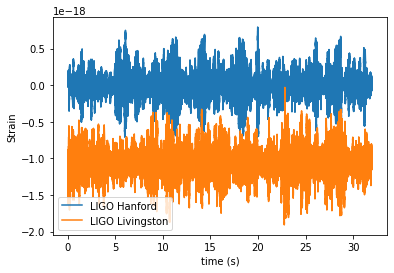

In [6]:
plt.plot(tn,fn1,label='LIGO Hanford')
plt.plot(tn,fn2,label='LIGO Livingston')

plt.xlabel('time (s)')
plt.ylabel('Strain')

plt.legend(loc='lower left')
plt.show()

Obviously, we can't see by eye anything yet. This is a job for spectral analysis!

Let's make spectrograms for the two datasets. This is just to show you that GW150914 was such a whopping big signal that it can be seen straight from the raw data. 

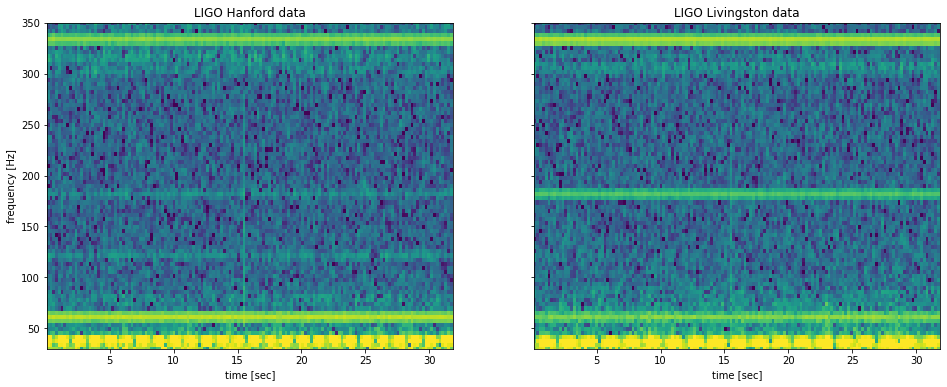

In [7]:
from scipy import signal

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# Make spectrogram for Hanford data
freq, time, power_spec = signal.spectrogram(fn1, sample_rate, window='hann', nperseg=4096)

# Plot the spectrogram
ax1.pcolormesh(time, freq, np.log10(power_spec), vmin=-48, vmax=-43)
ax1.set_ylabel('frequency [Hz]')
ax1.set_xlabel('time [sec]')
ax1.set_title('LIGO Hanford data')
plt.ylim([30,350])
# plt.show()

# Make spectrogram for Livingston data
freq, time, power_spec = signal.spectrogram(fn2, sample_rate, window='hann', nperseg=4096)

ax2.pcolormesh(time, freq, np.log10(power_spec), vmin=-48, vmax=-43)
ax2.set_title('LIGO Livingston data')
ax2.set_xlabel('time [sec]')

plt.show()

Notice the following:
- There are some prominent horizontal bands. This is noise. It turns out that various sources of noise can contribute with a characteristic frequency. For example, noise at 60 Hz is related to the AC power supply.
- Around the 15-16 s mark, there is a clear vertical line. That is the BH event! We expected a *chirp*, that the frequency is rising as a function of time. Here, plotted over a scale of 32 s, the frequency is rising so steeply that it is simply a vertical line. (You will see below that the chirp happens over a time scale of less than 0.1 s.)


### <font color=#46769B>Part (a): Processing the data [30 points total]</font>

Now that we have introduced the LIGO data, the goal here is to investigate the the chirp signal from GW150914 in more detail. Obviously, we don't have much information so far except the time it occurred and the fact that it seemed to span frequencies between 50-300 Hz.

Our next goal is to process the raw data into a form where the BH event is easily visible above the noise. Specifically, we will apply a series of signal-processing steps summarized in this figure:
<img src="https://inspirehep.net/files/740837278b6d562fad5b6ec6cf268515" width="600">
This figure is from [A guide to LIGO-Virgo detector noise and extraction of transient gravitational-wave signals](https://arxiv.org/abs/1908.11170) and is nicely discussed in this [blog post](https://cplberry.com/2020/02/09/gw-data-guides/).

Below are the steps you need to perform. You are meant to perform these steps for both Hanford and Livingston datasets, thereby producing two versions of the above plots.

#### <font color=#46769B>Step 1: Select out the signal region [5 points]</font>

First, select out a segment of the samples, `fn1_signal` and `fn2_signal`, to represent the signal region where the gravitational wave event has occured. Select the 4s window 

$$13 \; {\rm s} \le t < 17 \; {\rm s} \, .$$

Note your segments should have exactly `4*sample_rate` elements. Plot the strain as a function of time. (This is the top blue plot above.)



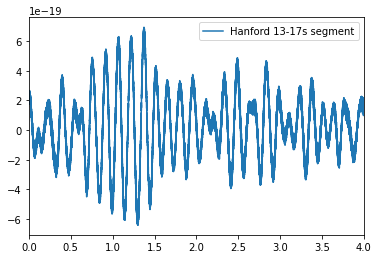

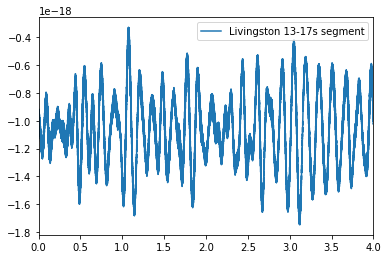

In [9]:
fn1_signal = []
fn2_signal = [] 

for i in range(len(tn)):
  if ((tn[i] >= 13) and (tn[i] < 17)):
    fn1_signal = np.append(fn1_signal,fn1[i])

for i in range(len(tn)):
  if ((tn[i] >= 13) and (tn[i] < 17)):
    fn2_signal = np.append(fn2_signal,fn2[i])

tn_new = np.arange(0,len(fn1_signal))*h

plt.plot(tn_new,fn1_signal,label='Hanford 13-17s segment')
plt.legend()
plt.xlim([0,4])
plt.show()

plt.plot(tn_new,fn2_signal,label='Livingston 13-17s segment')
plt.legend()
plt.xlim([0,4])
plt.show()

#### <font color=#46769B>Step 2: Window function [5 points]</font>

2. Apply a window function to `fn1_signal` and `fn2_signal` to yield two new arrays, `fn1_signal_windowed` and `fn2_signal_windowed`. Use a `tukey` window function with `alpha=0.25`. Plot the strain as a function of time for these new arrays. (This is the green plot above.)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


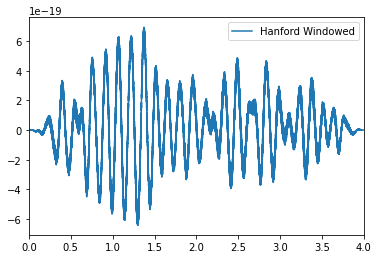

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


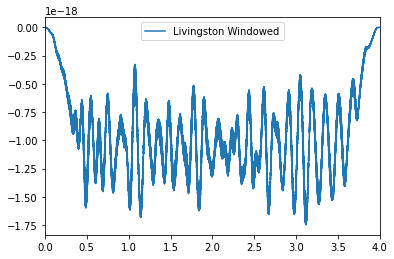

In [10]:
# working with fn1 first (Hanford)
from scipy import signal
from scipy.fft import fft, fftshift, ifft, fftfreq
N = len(fn1_signal)

window = signal.windows.tukey(N,0.25)

ywf1 = fft(window*fn1_signal)

fn1_windowed = ifft(ywf1)

plt.plot(tn_new,fn1_windowed,label='Hanford Windowed')
plt.xlim([0,4])
plt.legend()
plt.show()

#Livingston

ywf2 = fft(window*fn2_signal)

fn2_windowed = ifft(ywf2)

plt.plot(tn_new,fn2_windowed,label='Livingston Windowed')
plt.xlim([0,4])
plt.legend()
plt.show()

#### <font color=#46769B>Step 3: Whitening [10 points]</font>

Next, apply a process known as [__whitening__](https://en.wikipedia.org/wiki/Whitening_transformation) to the data. The idea is to apply a tranformation that can make LIGO noise (which is a complicated function of frequency) look more like white noise (which has equal intensity as a function of frequency). The purpose is that by making the noise more uniform, a signal will appear as an genuine excess above the background noise.

The steps you must perform are as follows. First we compute the mean power spectrum of the noise over a 4-second time interval (the same duration as our signal region).

- Divide the full samples into 8 4-second segments. Compute the power spectrum of each segment $a=1, 2, ..., 8$:

$$P_k^{(1)} = |c_k^{(1)}|^2, \quad P_k^{(2)} = |c_k^{(2)}|^2, \quad ... , \quad P_k^{(8)} = |c_k^{(8)}|^2 \, .$$

- Compute the *mean* power spectrum $\langle P_k\rangle$ by averaging $P_k$ over all 8 segments:

$$\langle P_k \rangle = \frac{1}{8} \sum_{a=1}^8 P_k^{(a)} \, .$$

Technically, your signal region is in here too, but it makes up only very small fraction of the total time, so it suffices to not worry about that here. 

Next, you will whiten the signal region by performing the following steps:

- Take the DFT of your signal region segment to compute the Fourier coefficients, $c_k^{\rm signal}$.

- Compute the whitened Fourier coefficients in the signal region (denoted by a hat), by normalizing by the power spectrum of the noise:

$$\hat{c}^{\rm signal}_k = \frac{c_k^{\rm signal}}{\sqrt{\langle P_k\rangle}}$$

- Compute the whitened samples $\hat{f}_n$, computed as the inverse DFT of $\hat{c}_k$. 

After performing these steps, plot your samples $\hat{f}_n$ as a function of time. (This is the red plot above. Note the overall amplitude of the Fourier coefficients is arbitrary, so don't worry if your scale on the $y$-axis is different from the published plot above.)

65536
65536


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


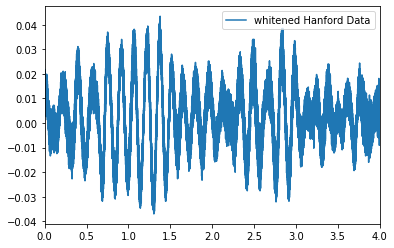

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


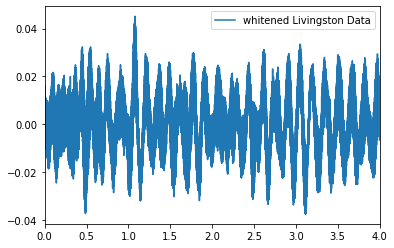

In [11]:
ck = fft(fn1)

ck1 = ck[0:65536]
ck2 = ck[65536:65536*2]
ck3 = ck[65536*2:65536*3]
ck4 = ck[65536*3:65536*4]
ck5 = ck[65536*4:65536*5]
ck6 = ck[65536*5:65536*6]
ck7 = ck[65536*6:65536*7]
ck8 = ck[65536*7:65536*8]

power_spec1 = (np.abs(ck1))**2
power_spec2 = (np.abs(ck2))**2
power_spec3 = (np.abs(ck3))**2
power_spec4 = (np.abs(ck4))**2
power_spec5 = (np.abs(ck5))**2
power_spec6 = (np.abs(ck6))**2
power_spec7 = (np.abs(ck7))**2
power_spec8 = (np.abs(ck8))**2

power_spec_sum = power_spec1+power_spec2+power_spec3+power_spec4+power_spec5+power_spec6+power_spec7+power_spec8
p = power_spec_sum/8
print(len(p)) #delete

print(len(fn1_signal)) #delete

ck_fn1_signal = fft(fn1_signal)

whitened_ck1 = ck_fn1_signal / np.sqrt(p)

whitened_fn1 = ifft(whitened_ck1)

plt.plot(tn_new,whitened_fn1,label='whitened Hanford Data')
plt.legend()
plt.xlim([0,4])
plt.show()

ck = fft(fn2)

ck1 = ck[0:65536]
ck2 = ck[65536:65536*2]
ck3 = ck[65536*2:65536*3]
ck4 = ck[65536*3:65536*4]
ck5 = ck[65536*4:65536*5]
ck6 = ck[65536*5:65536*6]
ck7 = ck[65536*6:65536*7]
ck8 = ck[65536*7:65536*8]

power_spec1 = (np.abs(ck1))**2
power_spec2 = (np.abs(ck2))**2
power_spec3 = (np.abs(ck3))**2
power_spec4 = (np.abs(ck4))**2
power_spec5 = (np.abs(ck5))**2
power_spec6 = (np.abs(ck6))**2
power_spec7 = (np.abs(ck7))**2
power_spec8 = (np.abs(ck8))**2

power_spec_sum = power_spec1+power_spec2+power_spec3+power_spec4+power_spec5+power_spec6+power_spec7+power_spec8
p = power_spec_sum/8

ck_fn2_signal = fft(fn2_signal)

whitened_ck2 = ck_fn2_signal / np.sqrt(p)

whitened_fn2 = ifft(whitened_ck2)

plt.plot(tn_new,whitened_fn2,label='whitened Livingston Data')
plt.legend()
plt.xlim([0,4])
plt.show()

#### <font color=#46769B>Step 4: Bandpass filter [10 points]</font>

Finally, apply a bandpass filter by keeping only Fourier modes with frequencies in the region

$$ 35 \; {\rm Hz} \le |\nu_k| \le 350 \; {\rm Hz}$$

and zeroing out the other Fourier coefficients. Once again, perform an inverse DFT to compute (finally) the whitened, bandpassed samples. Make a plot of your new samples vs time. (This is the black plot above.)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


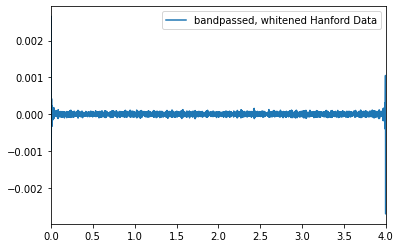

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


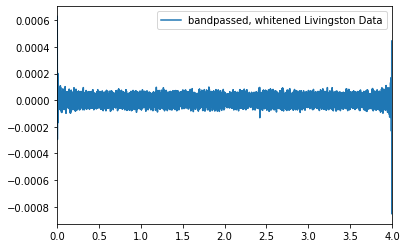

In [12]:
nu_k1 = fftfreq(len(fn1_signal),d=h)

new_ck1 = np.where( (nu_k1 >= 35) & (nu_k1 <= 350),whitened_ck1,0 )

fn1_whitened_bandpassed = ifft(new_ck1)

plt.plot(tn_new,fn1_whitened_bandpassed,label='bandpassed, whitened Hanford Data')
plt.legend()
plt.xlim([0,4])
plt.show()

nu_k2 = fftfreq(len(fn2_signal),d=h)

new_ck2 = np.where( (nu_k2 >= 35) & (nu_k2 <= 350),whitened_ck2,0 )

fn2_whitened_bandpassed = ifft(new_ck2)

plt.plot(tn_new, fn2_whitened_bandpassed,label='bandpassed, whitened Livingston Data')
plt.legend()
plt.xlim([0,4])
plt.show()

### <font color=#46769B>Part (b): Chirp mass [20 points total]</font>

#### <font color=#46769B>Step 1: Plot the chirp signal [5 points]</font>

After the steps in Part (a), the BH event should be visible as a prominent peak. Using your bandpassed, whitened samples from Part (a), plot the strain as a function of time over a 0.1 second time window located to cover the gravitational wave event.
- Plot the Hanford and Livingston data on the same plot.
- Apply a time shift and amplitude rescaling to the Livingston data so that both events look as similar as possible. 

That is, do the following:
```py
plt.plot(t,fn1_whitened_bandpassed,label='Hanford')
plt.plot(t+tshift,rescaling*fn2_whitened_bandpassed,label='Livingston')
plt.xlim([xmin,xmin+0.1])
plt.legend()
plt.show()
```
where `tshift` and `rescaling` are numbers that you can choose by eye so that the two plots line up as best as possible. (Note: `tshift` should be of order the light-travel time between the two detectors, 0.01 s, and can be positive or negative.)

The waveforms for both plots should look similar, appearing as an oscillating function that oscillates faster and faster until it ends. This corresponds to BHs orbiting faster and faster as they inspiral until they finally merge together.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


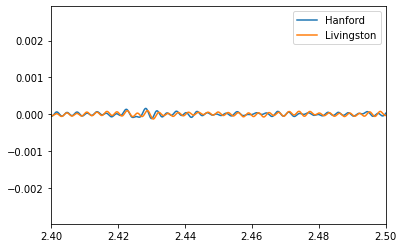

In [13]:
xmin = 2.4
tshift = 0.01
rescaling = 1

plt.plot(tn_new,fn1_whitened_bandpassed,label='Hanford')
plt.plot(tn_new+tshift,rescaling*fn2_whitened_bandpassed,label='Livingston')
plt.xlim([xmin,xmin+0.1])
plt.legend()
plt.show()

#### <font color=#46769B>Step 2: Chirp mass [15 points]</font>

Next, we will perform a simplified analysis of the chirp signal to extract a quantity known as the [__chirp mass__](https://en.wikipedia.org/wiki/Chirp_mass). The chirp mass is an effective mass parameter

$$m_{\rm chirp} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$$

where $m_1$ and $m_2$ are the two BH masses. If the two BHs are of equal mass, then $m_{\rm chirp} \approx 0.87 \, m_{1,2}$. Chirp mass, therefore, is comparable to the BH masses.

The chirp mass is extracted from the derivative of the frequency (how the oscillations are speeding up in time) according to:

$$\frac{d \nu_{\rm signal}}{dt} = 5.8 \times 10^{-7} m_{\rm chirp}^{5/3} \nu_{\rm signal}^{11/3}$$

where $\nu_{\rm signal}$ is the frequency of the BH signal, in units of ${\rm s}^{-1}$, and $m_{\rm chirp}$ is given in $M_\odot$. 

Here we will avoid numerically extracting the derivative of $\nu_{\rm signal}$ by following an argument outlined [here](https://arxiv.org/pdf/1510.02426.pdf) to extract $m_{\rm chirp}$ (also noted [here](https://en.wikipedia.org/wiki/Chirp_mass#cite_note-7)). The formula relating $m_{\rm chirp}$ and $\nu_{\rm signal}$ can be integrated to be

$$\frac{3}{8} \nu_{\rm signal}^{-8/3} = - 5.8 \times 10^{-7} m_{\rm chirp}^{5/3} t + C $$

where $C$ is a constant. Furthermore, define $y = \tfrac{3}{8} \nu_{\rm signal}^{-8/3}$. 

The strategy is to determine $y$ as a function of $t$ numerically from the chirp signal. Then, fitting with a $y$ as a function of $t$ with a straight line $y = M t + B$, the slope $M$ is related to the chirp mass.

Here are the tasks you are to perform:

1. Determine (numerically) the $t$ values of the most prominent five or so extrema (minima and maxima) in the chirp signal and save this to a list or array, `t_extrema_list`.


2. Calculate the period $T$ for the signal as a function of $t$. The period is twice the distance between adjacent extrema. Save the period values to a list or array, `T_list`. Set the corresponding times to be the mid-times between adjacent extrema and save these values to a list or array, `t_list`.


3. From the $T$ values, determine the $y$ values and save these to an list or array, `y_list`.


4. Fit a straight-line of the form $y = M t + B$ through your data of `y_list` vs `t_list`. From the slope $M$, determine the chirp mass from the formula

$${\rm slope} \; M = - 5.8 \times 10^{-7} m_{\rm chirp}^{5/3}$$

*The answer you should find is: $m_{\rm chirp} \approx 30 \; M_\odot$.*

In [14]:
t_extrema_list = []

# find most prominent values of fn in fn1_signal

for i in range(0,5):
  max = 0
  
  for j in range((len(fn1_whitened_bandpassed))):
    if np.abs(fn1_whitened_bandpassed[j]) > np.abs(max):
      max = fn1_whitened_bandpassed[j]
      fn1_whitened_bandpassed[j] = 0 

  t_extrema_list.append(max)


t_extrema_list = np.array((t_extrema_list))
t_extrema_list = t_extrema_list.real

#as far as I could get.



[-0.00032807 -0.00057905 -0.00082492 -0.00106342 -0.00129238]
